In [2]:
import yfinance as yf

# Download historical stock data
stock_data = yf.download('AAPL', start='2010-01-01', end='2021-12-31')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


[*********************100%%**********************]  1 of 1 completed


In [31]:
import pandas as pd

# Handle missing values
stock_data.dropna(inplace=True)

# Feature engineering

# Calculate volatility measures
stock_data['Range'] = stock_data['High'] - stock_data['Low']

In [32]:
# Select relevant features
X = stock_data[['Open', 'High', 'Low', 'Volume', 'Range']]
y = stock_data['Close']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.isna().sum()

Open      0
High      0
Low       0
Volume    0
Range     0
dtype: int64

In [35]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.38261749427152336
Mean Absolute Error: 0.3266763540838183


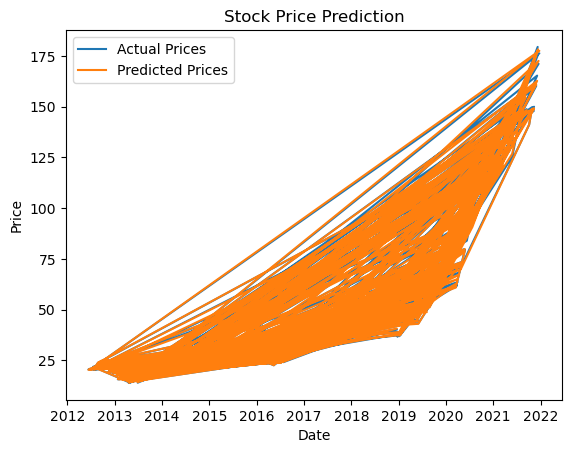

In [37]:
import matplotlib.pyplot as plt

# Visualize predictions
plt.plot(y_test.index, y_test.values, label='Actual Prices')
plt.plot(y_test.index, predictions, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()